#  Using DoWhy and EconML to Evaluate the Causal effects on Marketing Mix data

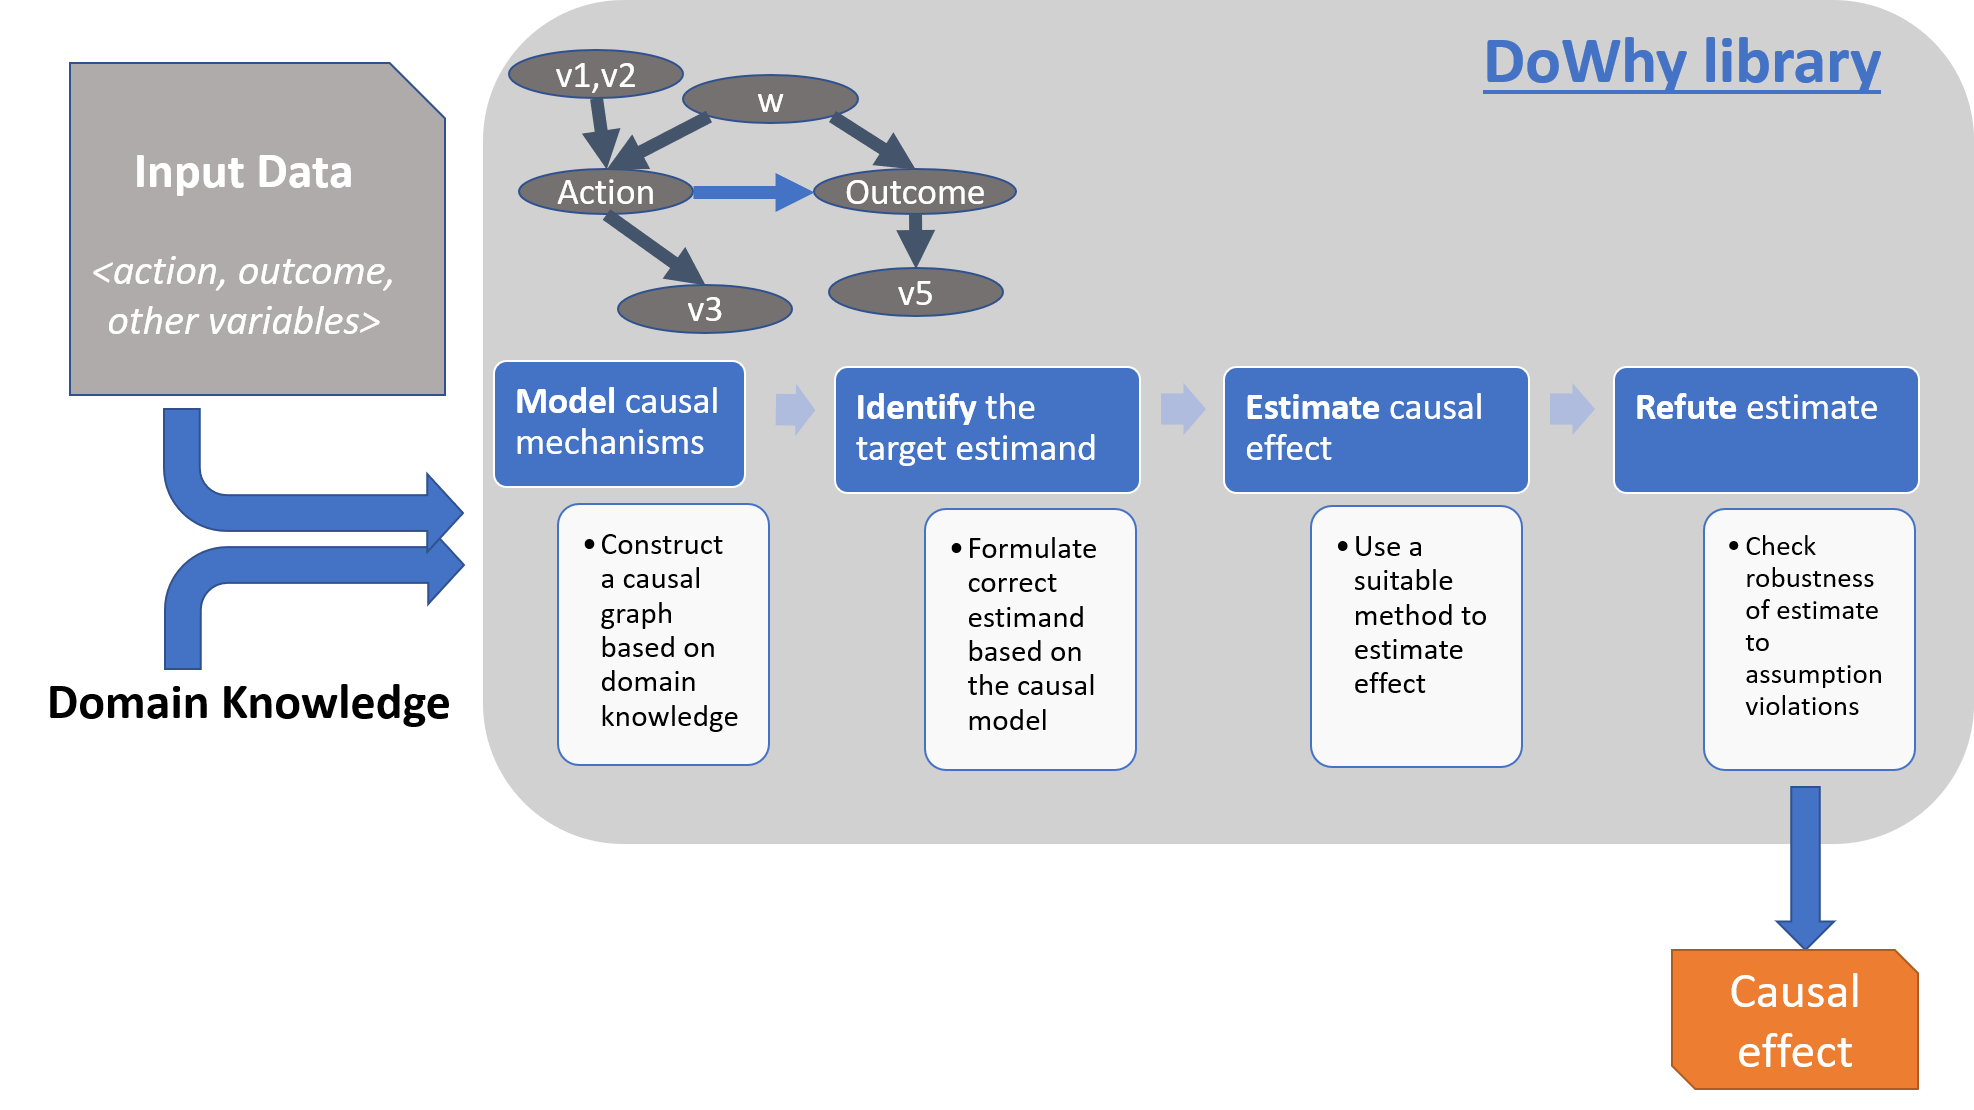


# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy
import dowhy

print("SciPy version:", scipy.__version__)
print("DoWhy version:", dowhy.__version__)

SciPy version: 1.11.4
DoWhy version: 0.11.1


In [ ]:
import numpy as np


In [ ]:

!pip install numpy arviz --no-cache-dir --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 257.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 246.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 268.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 196.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 172.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 237.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 246.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 257.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 283.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 333.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install dowhy
!pip install econml

from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter



  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import graphviz as gr
import matplotlib.pyplot as plt
import numpy as np
import math





In [ ]:
import pandas as pd
import dowhy

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [ ]:


!pip install seaborn
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'loggers': {
        '': {
            'level': 'INFO',
        },
    }
}

logging.config.dictConfig(DEFAULT_LOGGING)

!apt install graphviz libgraphviz-dev -y # Install the system library graphviz and the necessary development files
!pip install pygraphviz  # Install the pygraphviz package

import pygraphviz as pgv  # Import pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!pip install scipy==1.9.3 # Install a compatible version of scipy, this version contains the function in the correct location
import arviz as az
az.style.use("arviz-darkgrid")

In [ ]:
!pip install numpy==1.26.4 pandas==2.2.2 scikit-learn==1.3.2 numba==0.59.1
!pip install dowhy==0.11.1 econml==0.15.0 arviz==0.16.1

# Example 1: Basic Confouder Example

In [ ]:
np.random.seed(42)
#rvar = 1 if np.random.uniform() >0.5 else 0
beta1 = 0
data_dict = dowhy.datasets.xy_dataset(10000, effect=beta1,
                                      num_common_causes=1,
                                      sd_error=0.2
                                      )
df1 = data_dict['df']
print(df1[["Treatment", "Outcome", "w0"]].head())

   Treatment    Outcome        w0
0   4.129452   7.924519 -1.969891
1  10.138660  20.271525  4.166312
2   3.129907   5.881263 -2.999630
3   5.154256   9.721384 -1.150350
4   1.956425   4.245947 -3.996744


In [ ]:
df1

,Treatment,Outcome,w0,s
0,4.129452,7.924519,-1.969891,0.556664
1,10.138660,20.271525,4.166312,9.857676
2,3.129907,5.881263,-2.999630,8.000185
3,5.154256,9.721384,-1.150350,8.688091
4,1.956425,4.245947,-3.996744,6.942943
...,...,...,...,...
9995,6.008862,11.574849,-0.251358,8.936141
9996,1.848354,4.771520,-3.751977,6.501980
9997,2.009923,4.377643,-3.849014,7.388569
9998,2.712846,5.570091,-3.386307,6.216615


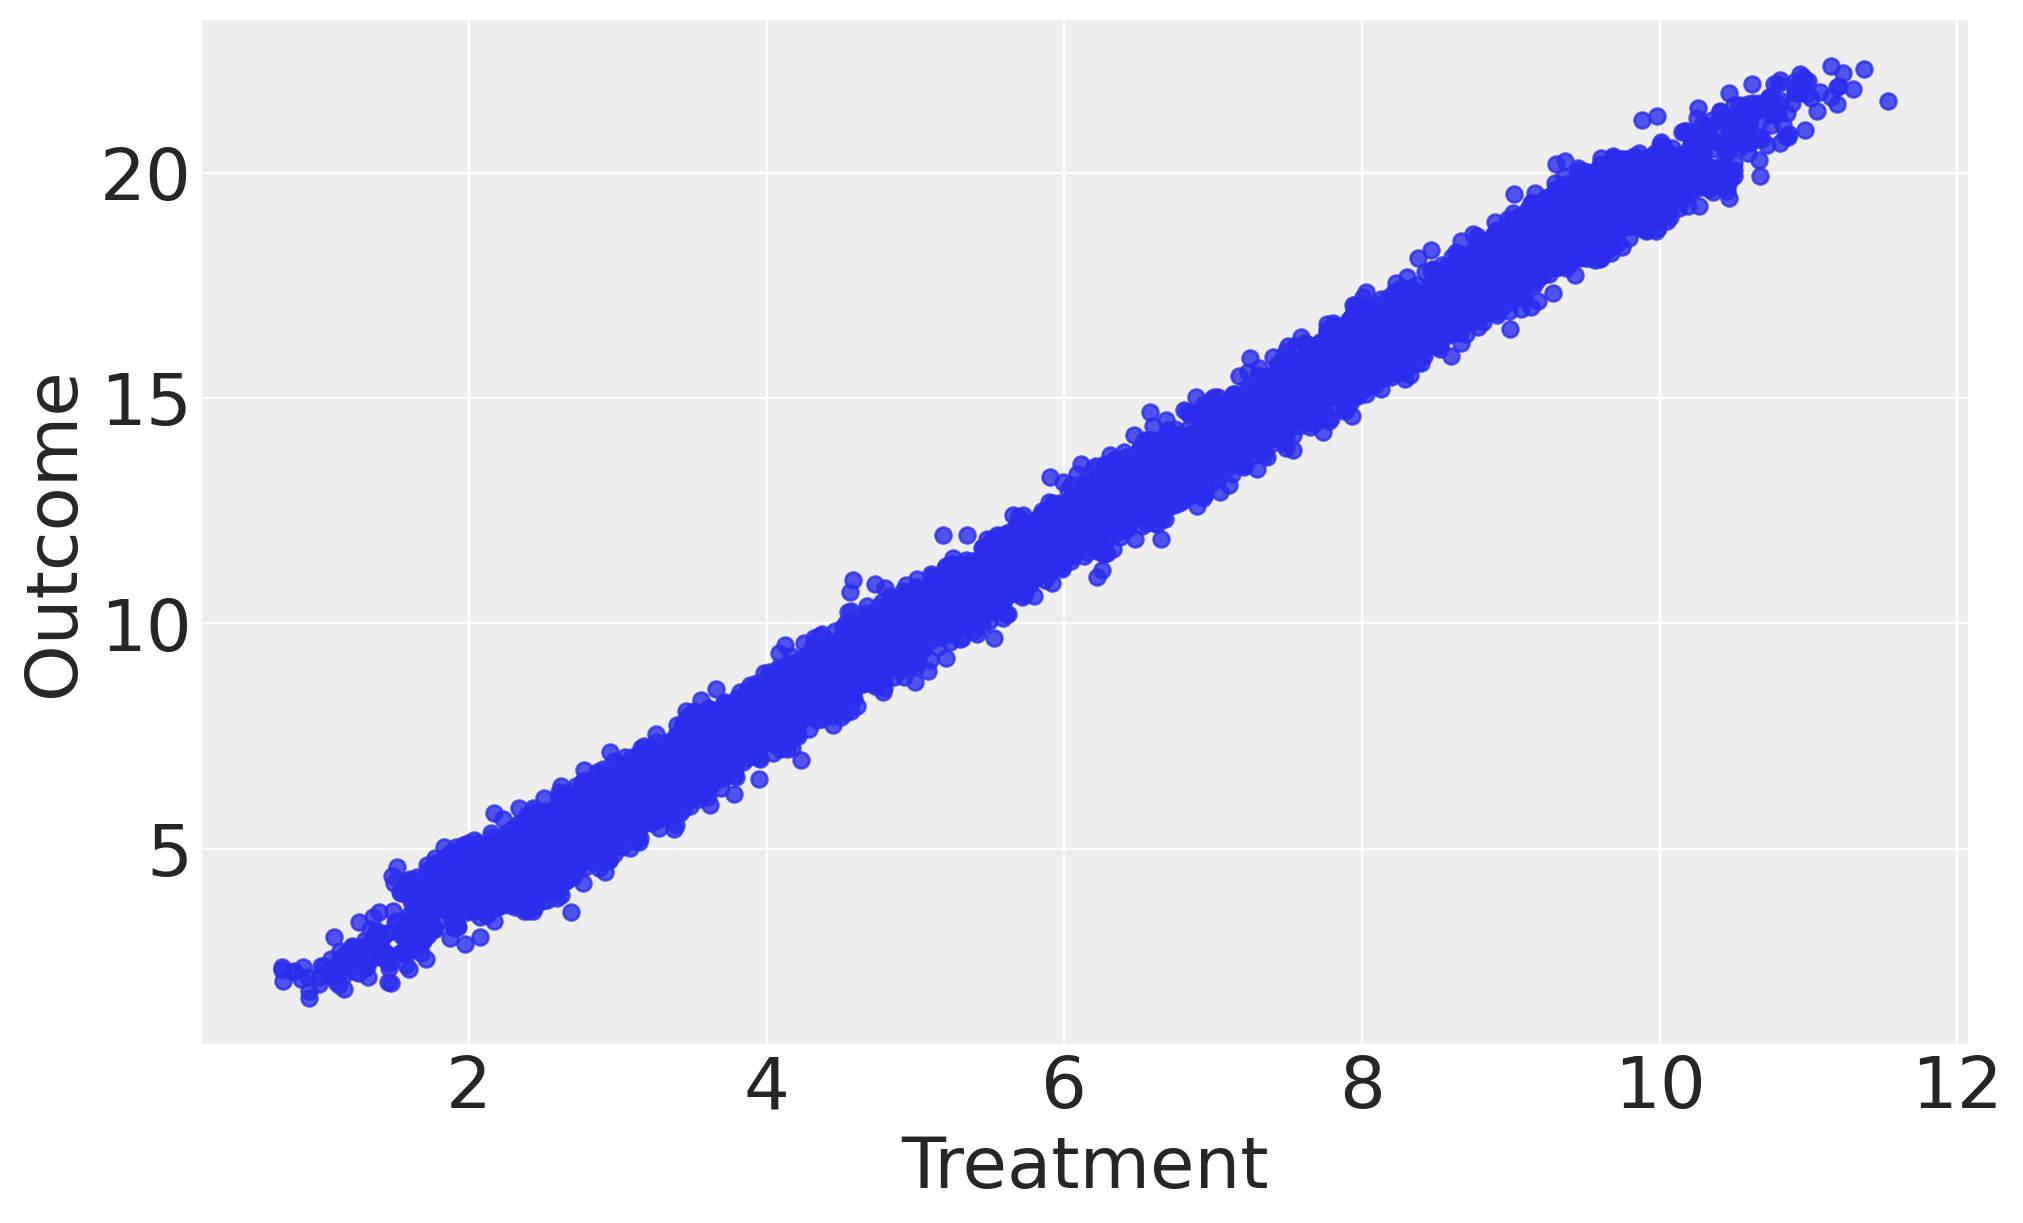

In [ ]:
# @title Treatment vs Outcome

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='Treatment', y='Outcome', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

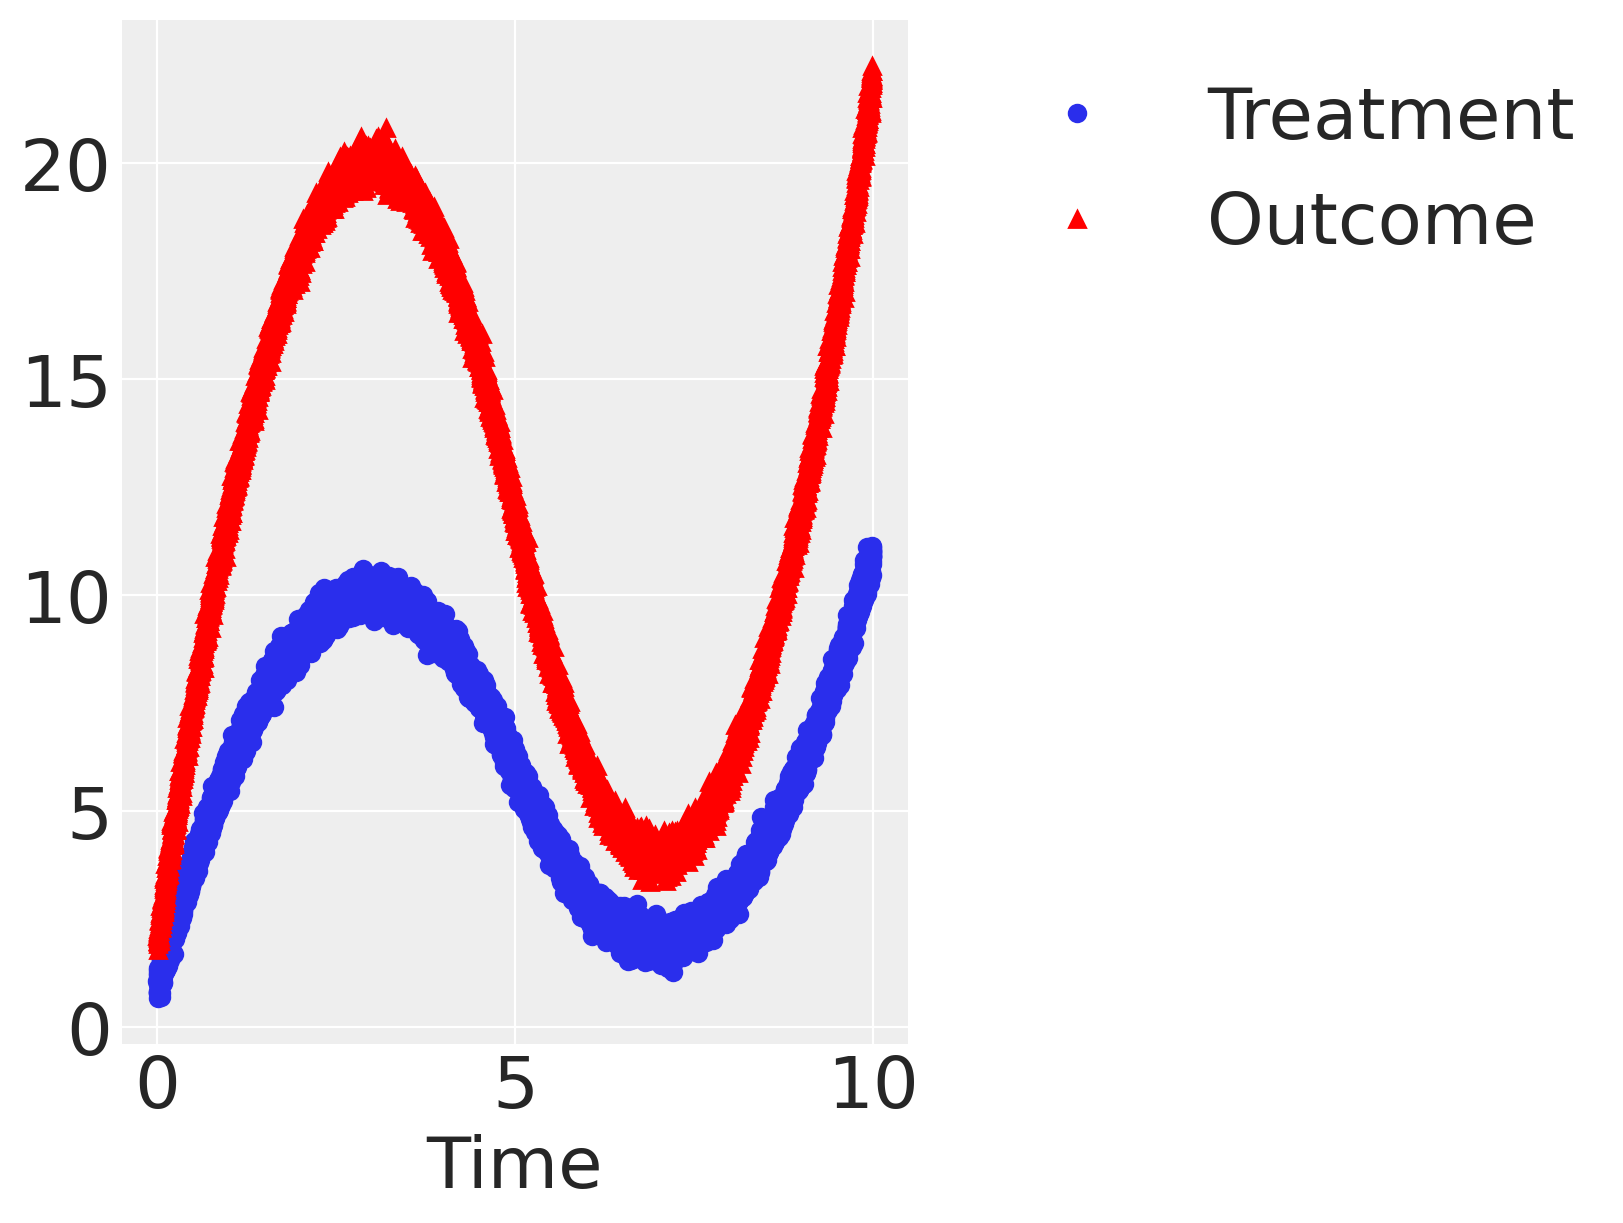

In [ ]:
dowhy.plotter.plot_treatment_outcome(df1[data_dict["treatment_name"]], df1[data_dict["outcome_name"]],
                             df1[data_dict["time_val"]])

Pearson Correlation Matrix:
           Treatment   Outcome        w0
Treatment   1.000000  0.996997  0.997612
Outcome     0.996997  1.000000  0.999404
w0          0.997612  0.999404  1.000000


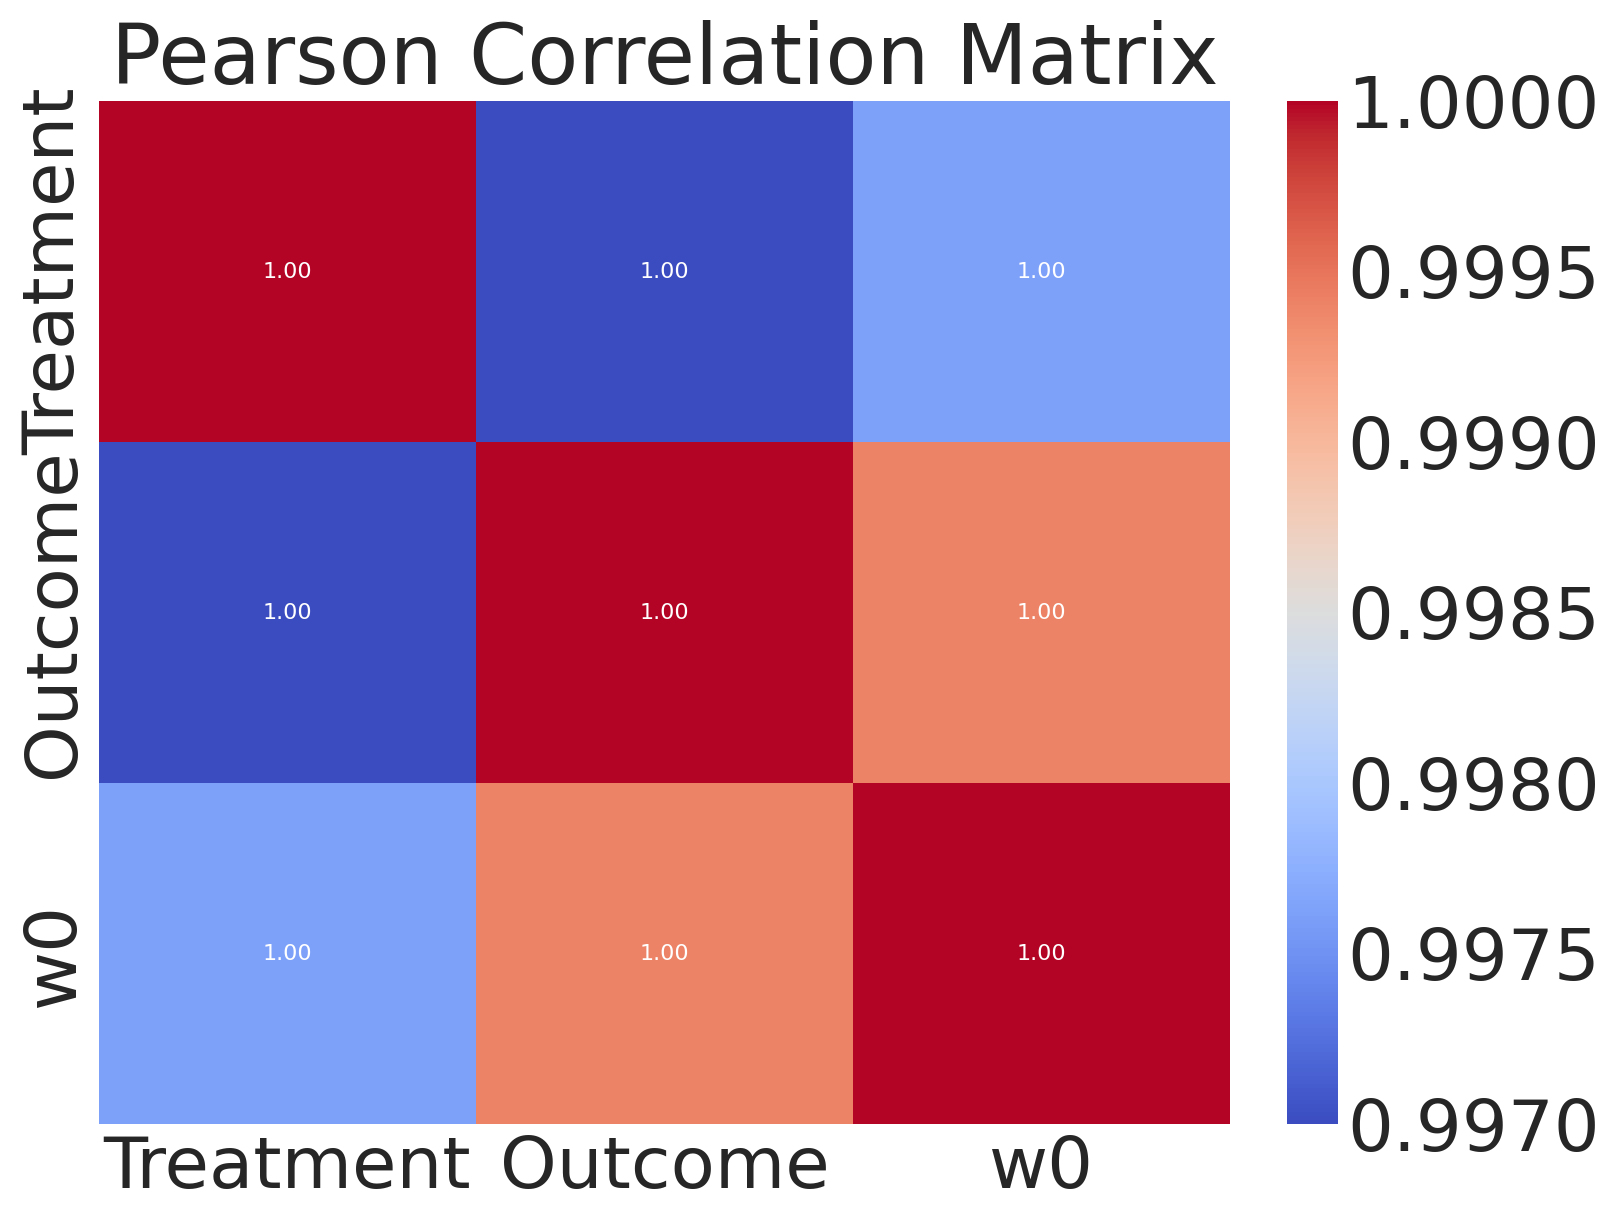

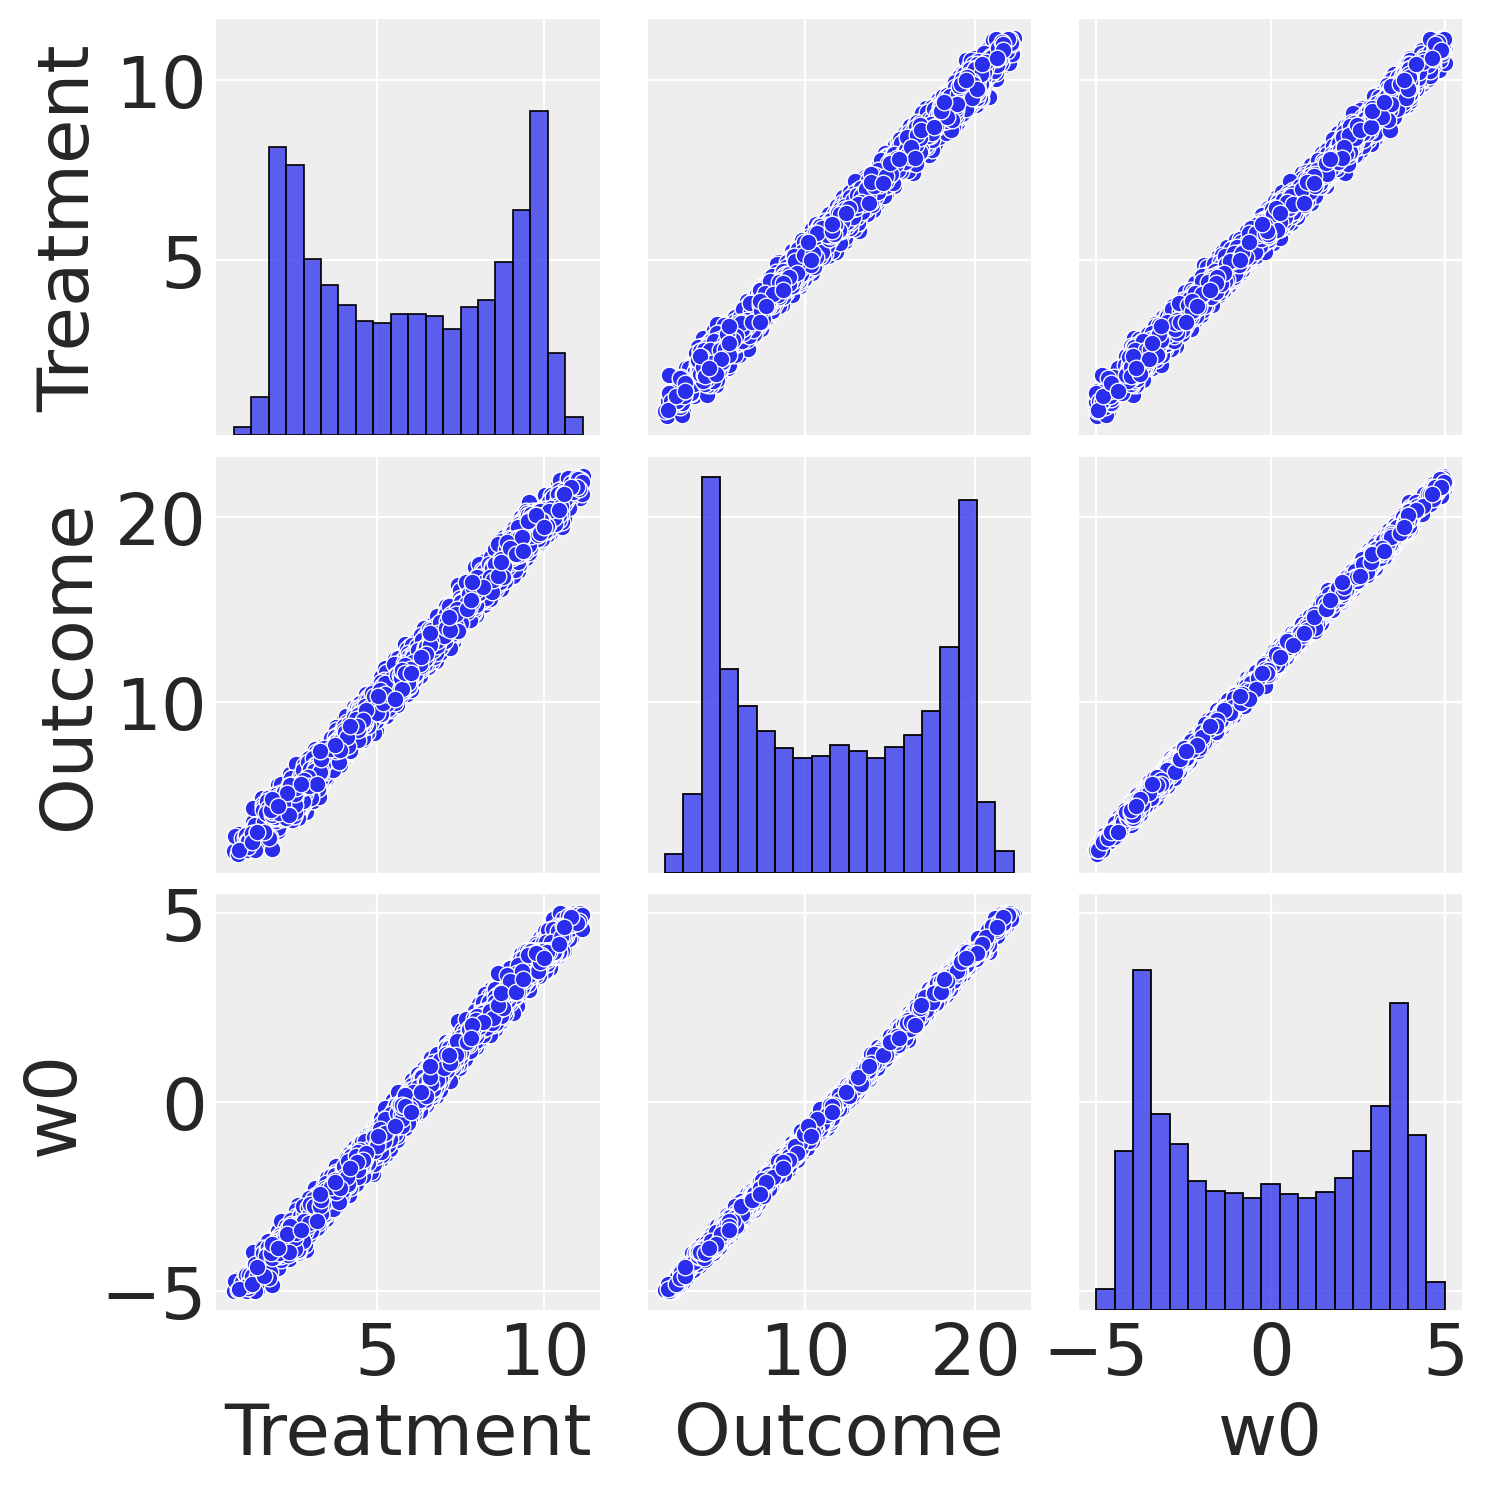

In [ ]:
import seaborn as sns
pearson_corr = df1[['Treatment', 'Outcome', 'w0']].corr(method='pearson')

# Print the Pearson correlation matrix
print("Pearson Correlation Matrix:")
print(pearson_corr)

# Visualize the Pearson correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

# Visualize pairwise relationships using pairplot
sns.pairplot(df1[['Treatment', 'Outcome', 'w0']])
plt.show()

Naive approach

- R-squared: 0.994, which means that 99.4% of the variance in the Outcome variable is explained by the Treatment variable. This suggests a very strong relationship between Treatment and Outcome.
- Prob (F-statistic): 0.00, meaning the overall model is statistically significant (the p-value is much smaller than the common significance level of 0.05)
- AS we will see later, the actual Causal Estimate is 0.006


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Define the dependent variable (Outcome)
y = df1['Outcome']

# Define the independent variable (Treatment), add constant to the model
X = df1[['Treatment']]
X = sm.add_constant(X)  # Adds a constant term (intercept) to the model

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Print the regression results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.657e+06
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:55:14   Log-Likelihood:                -6184.4
No. Observations:               10000   AIC:                         1.237e+04
Df Residuals:                    9998   BIC:                         1.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0636      0.010      6.179      0.0

### 1.Model

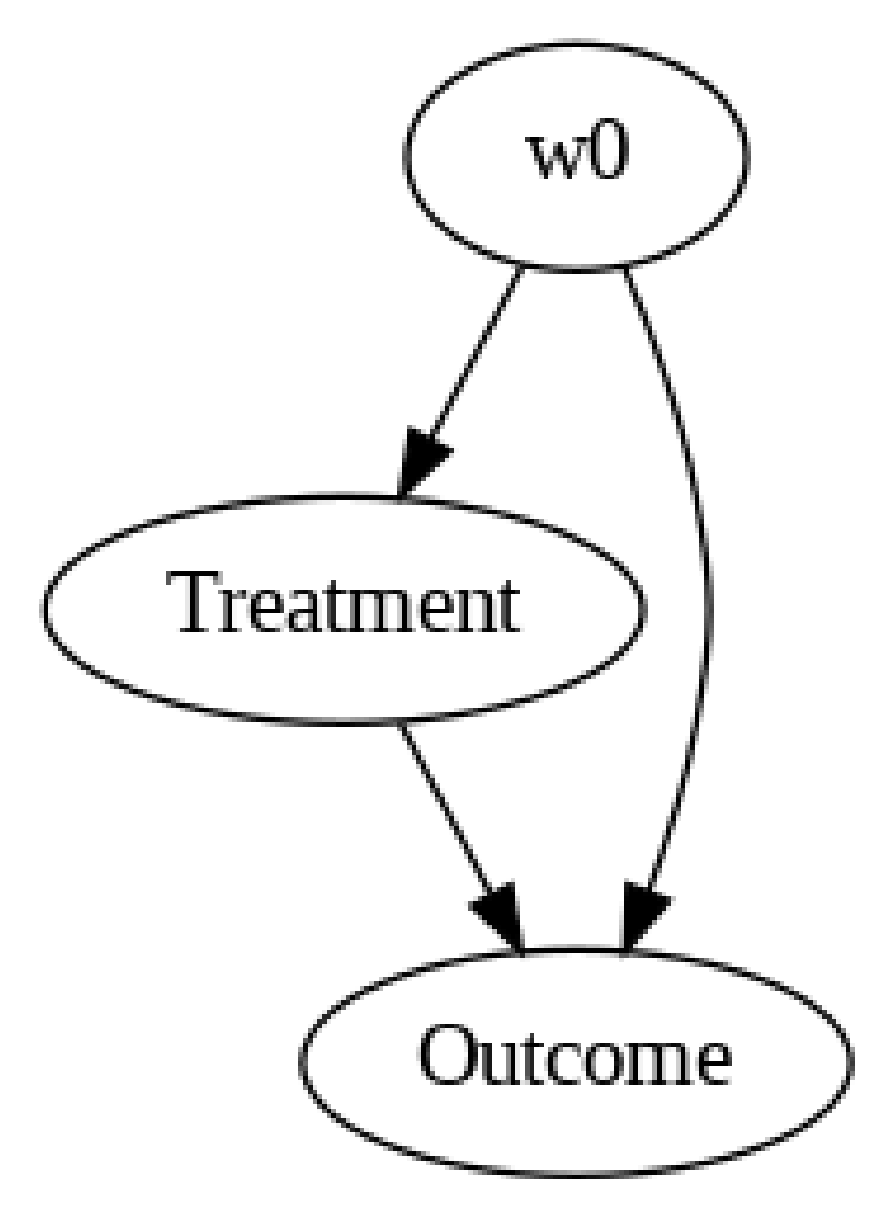

In [ ]:
model= CausalModel(
        data=df1,
        treatment=data_dict["treatment_name"],
        outcome=data_dict["outcome_name"],
        common_causes=data_dict["common_causes_names"],
        instruments=data_dict["instrument_names"])
model.view_model(layout="dot")

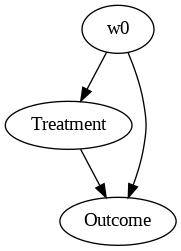

In [ ]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

### 2. Identification


In [ ]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                     
────────────(E[Outcome|w0])
d[Treatment]               
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w0,U) = P(Outcome|Treatment,w0)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### 3. Estimation


Basic Linear Regressor

Causal Estimate is 0.006470256202980806


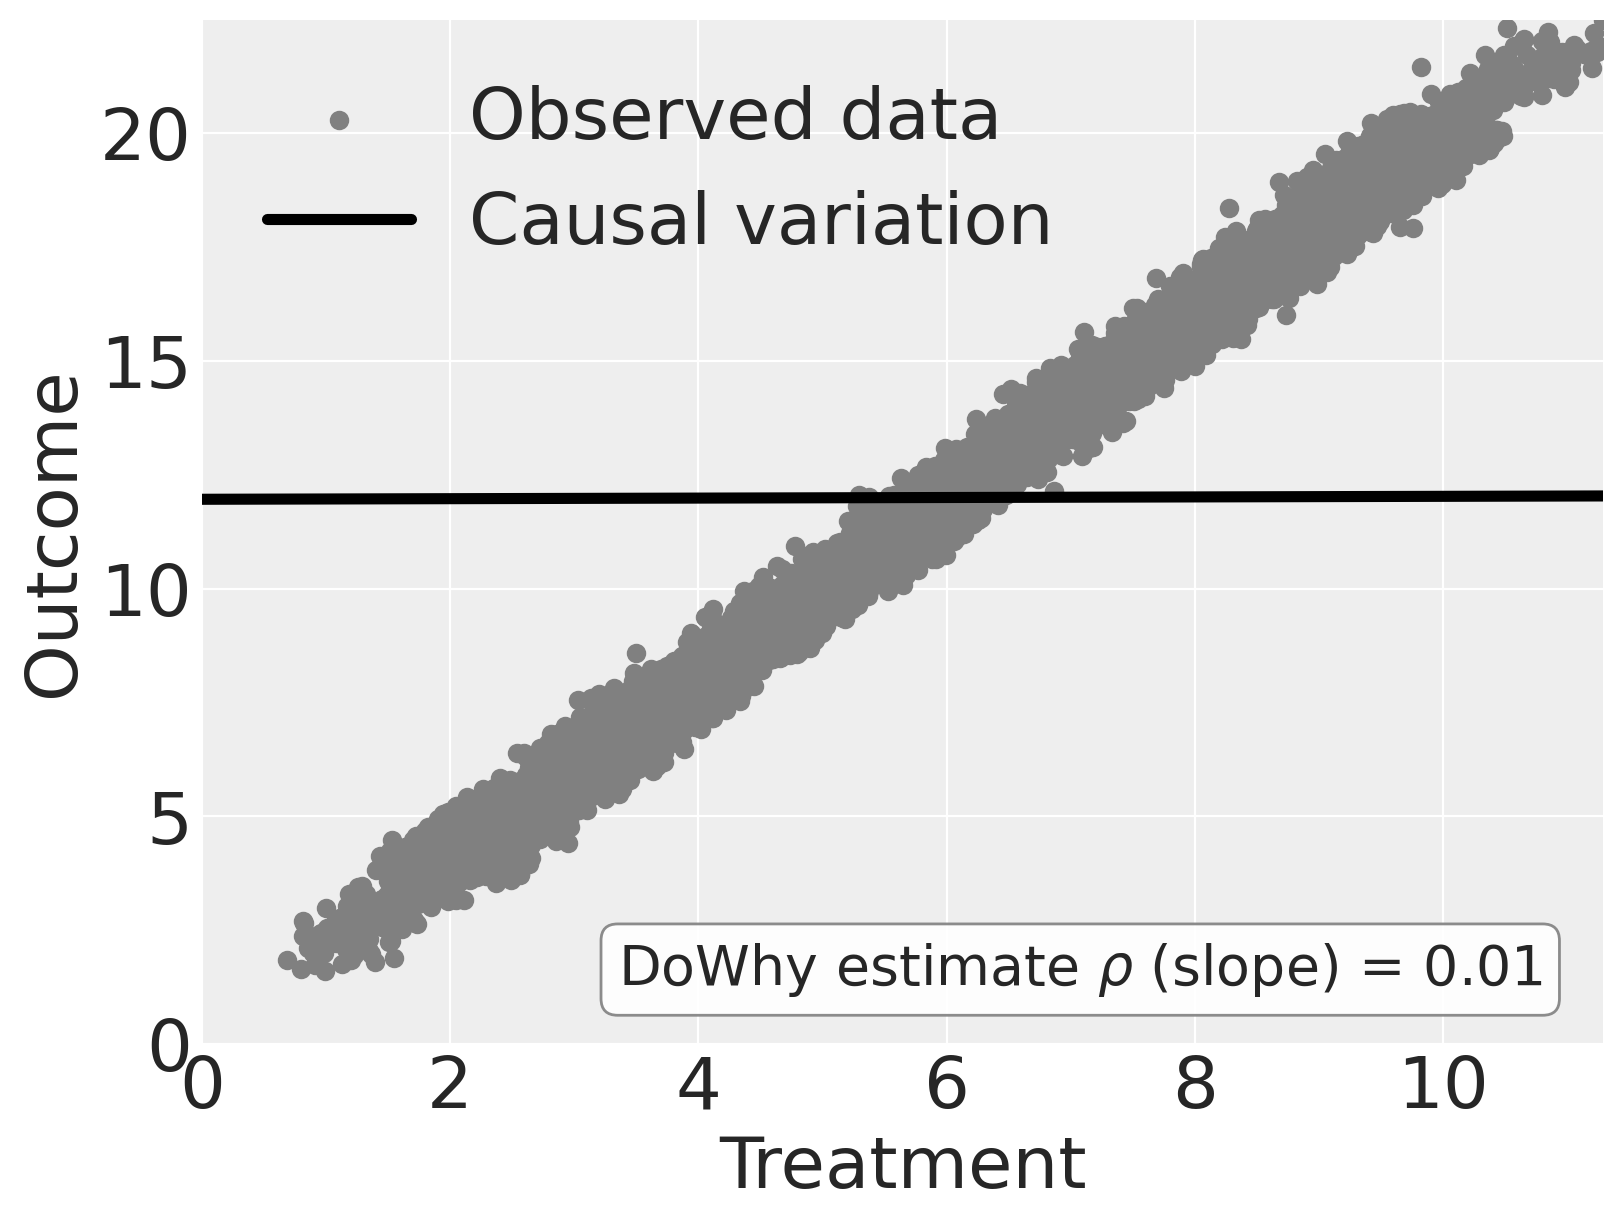

In [ ]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, df1[data_dict["treatment_name"]], df1[data_dict["outcome_name"]])

In [ ]:
print("DoWhy estimate is " + str(estimate.value))
print ("Actual true causal effect was {0}".format(beta))

DoWhy estimate is 0.006470256202980806
Actual true causal effect was 0


### 4. Refutation

1. Adding a random common cause variable


In [ ]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

Refute: Add a random common cause
Estimated effect:0.006470256202980806
New effect:0.006475451472466762
p value:0.8600000000000001



2. Replacing treatment with a random (placebo) variable

In [ ]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:0.006470256202980806
New effect:-5.3626721992863225e-05
p value:0.94



3. Removing a random subset of the data

In [ ]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)


Refute: Use a subset of data
Estimated effect:0.006470256202980806
New effect:0.006349551599852461
p value:0.96



# Example 2: Non-Linear dataset

In [ ]:
!pip uninstall -y scipy
!pip install scipy==1.11.4 --no-cache-dir --force-reinstall

Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 106.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible

In [ ]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.2/399.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.6.7
    Uninstalling cvxpy-1.6.7:
      Successfully uninstalled cvxpy-1.6.7


In [ ]:
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter
help(dowhy.datasets.xy_dataset)

Help on function xy_dataset in module dowhy.datasets:

xy_dataset(num_samples, effect=True, num_common_causes=1, is_linear=True, sd_error=1)



   Treatment    Outcome        w0         s        w1
0  19.177045  38.447359 -3.665800  7.578100 -0.921974
1  22.068052  43.839912 -3.990457  6.902313  0.549582
2  15.404019  30.896466  3.075562  9.659993 -0.468641
3  13.997161  27.999943 -2.850572  8.072114  0.251493
4  13.897033  27.467109  2.794859  1.902211 -0.123138


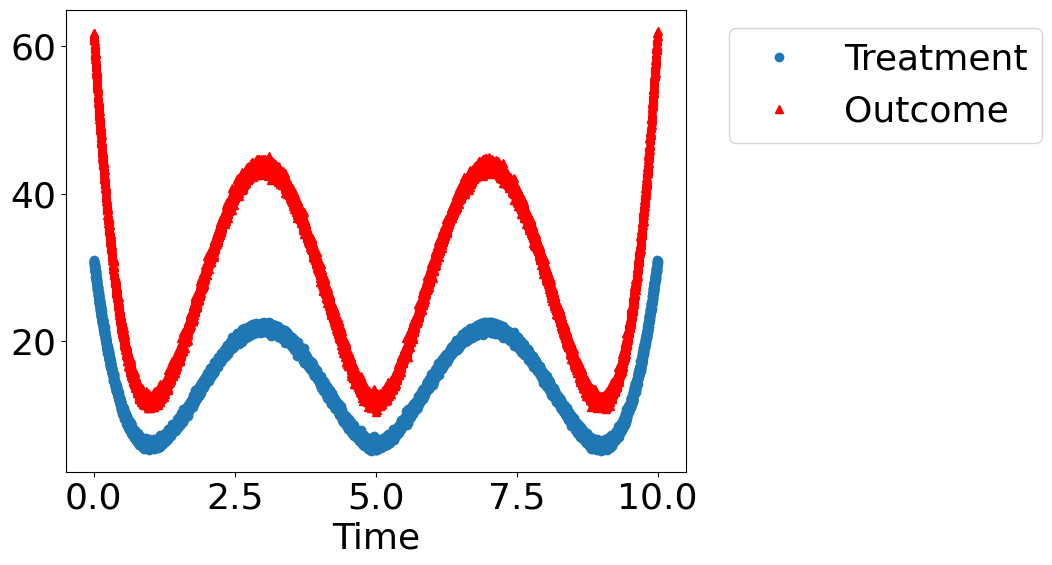

In [ ]:
# Set the seed for reproducibility
import numpy as np # Import numpy
np.random.seed(41)
#rvar = 1 if np.random.uniform() > 0.2 else 0

beta = 1
data_dict = dowhy.datasets.xy_dataset(10000, effect=beta,
                                      num_common_causes=2,
                                      is_linear= False,
                                      sd_error=0.2)
df = data_dict['df']
print(df.head())
dowhy.plotter.plot_treatment_outcome(df[data_dict["treatment_name"]], df[data_dict["outcome_name"]],
                             df[data_dict["time_val"]])

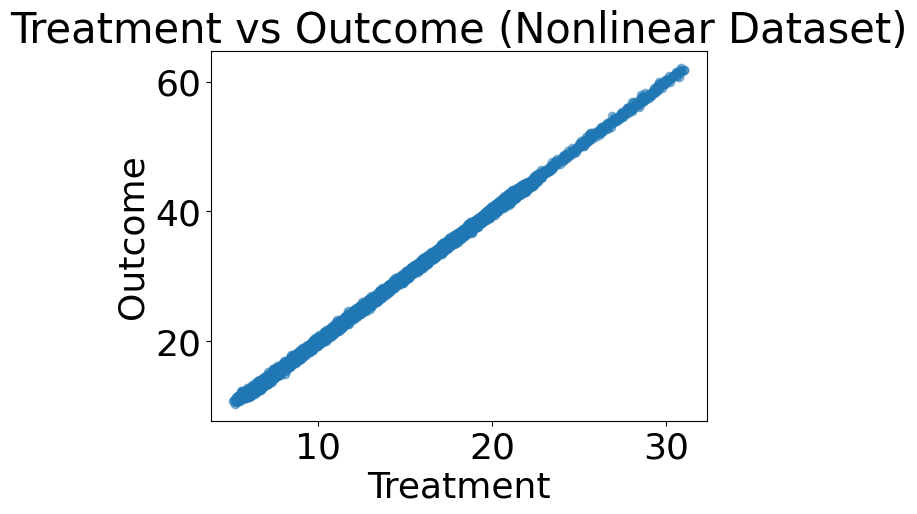

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Treatment vs Outcome
plt.scatter(df['Treatment'], df['Outcome'], alpha=0.5)
plt.title('Treatment vs Outcome (Nonlinear Dataset)')
plt.xlabel('Treatment')
plt.ylabel('Outcome')
plt.show()

Pearson Correlation Matrix:
           Treatment   Outcome        w0         s        w1
Treatment   1.000000  0.999690  0.001954 -0.002861  0.029299
Outcome     0.999690  1.000000  0.002069 -0.003039  0.022336
w0          0.001954  0.002069  1.000000 -0.245817  0.009766
s          -0.002861 -0.003039 -0.245817  1.000000 -0.000072
w1          0.029299  0.022336  0.009766 -0.000072  1.000000


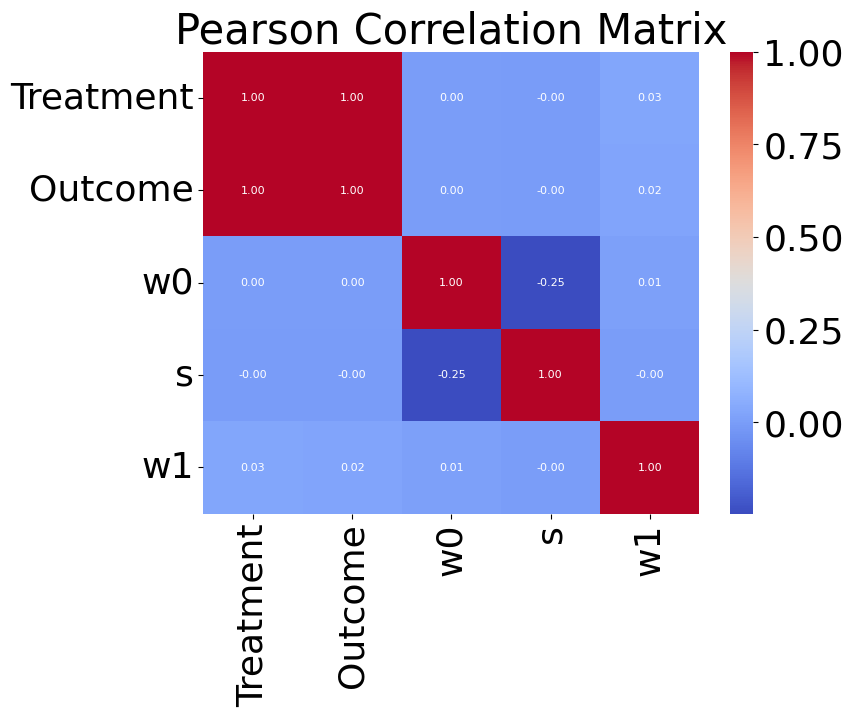

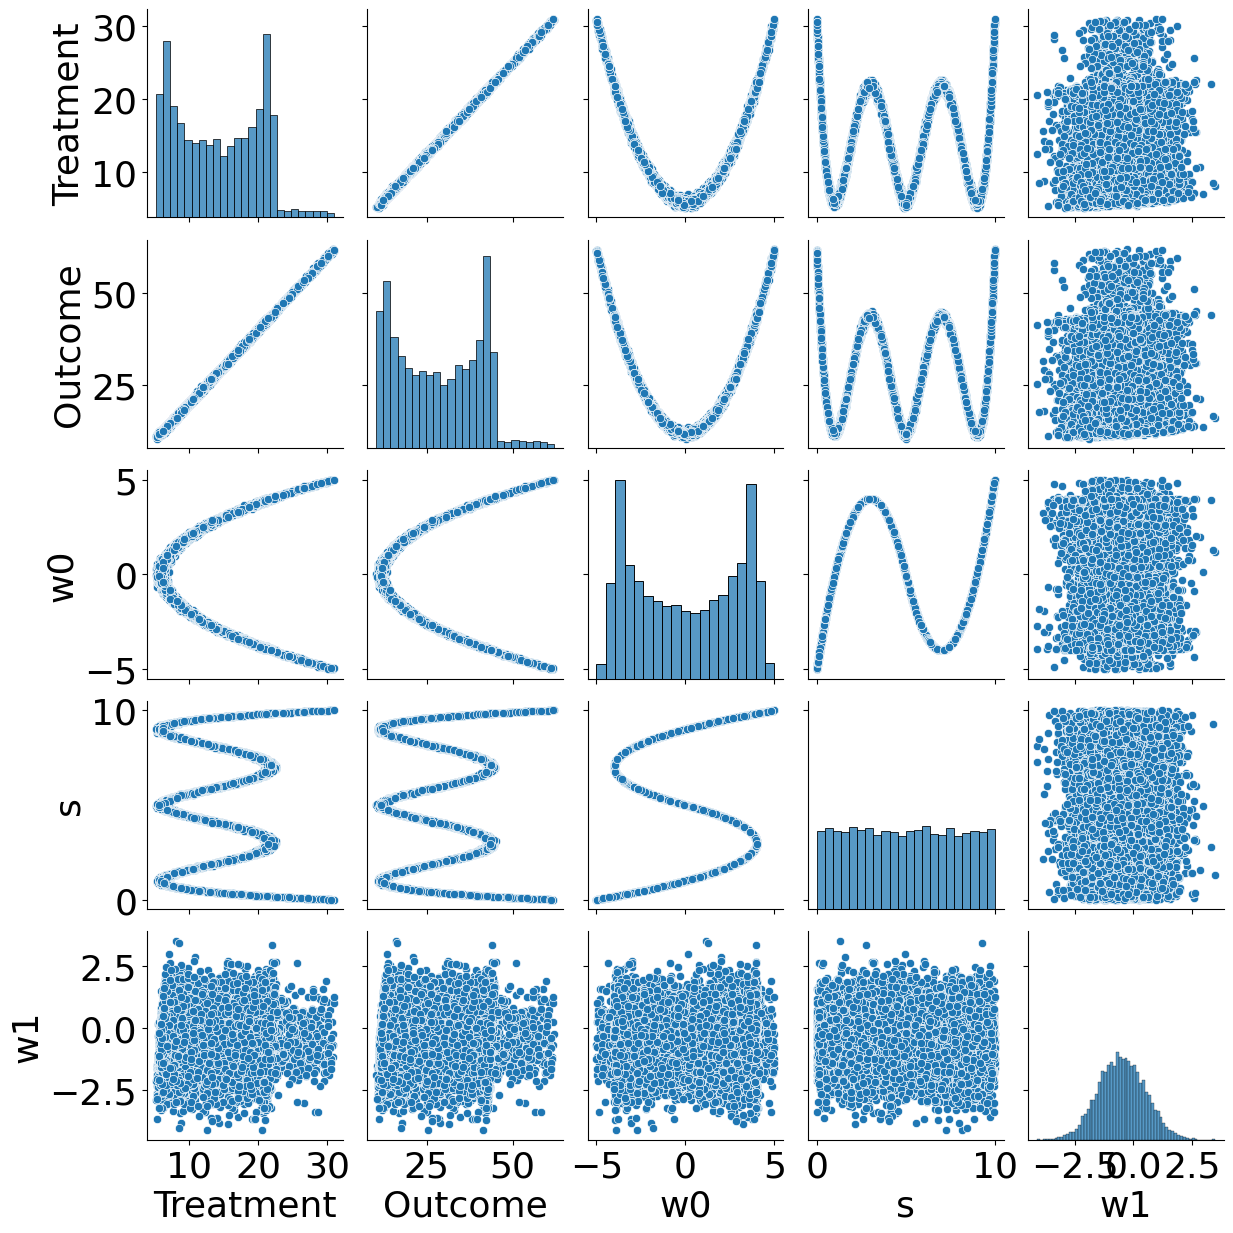

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Update the Pearson correlation calculation to include all relevant columns
pearson_corr = df[['Treatment', 'Outcome', 'w0', 's', 'w1']].corr(method='pearson')

# Print the Pearson correlation matrix
print("Pearson Correlation Matrix:")
print(pearson_corr)

# Visualize the Pearson correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

# Visualize pairwise relationships using pairplot
sns.pairplot(df[['Treatment', 'Outcome', 'w0', 's', 'w1']])
plt.show()

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Define the dependent variable (Outcome)
y = df['Outcome']

# Define the independent variable (Treatment), add constant to the model
X = df[['Treatment']]
X = sm.add_constant(X)  # Adds a constant term (intercept) to the model

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Print the regression results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.610e+07
Date:                Wed, 23 Jul 2025   Prob (F-statistic):               0.00
Time:                        08:18:59   Log-Likelihood:                -2062.8
No. Observations:               10000   AIC:                             4130.
Df Residuals:                    9998   BIC:                             4144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0513      0.008      6.672      0.0

## Model

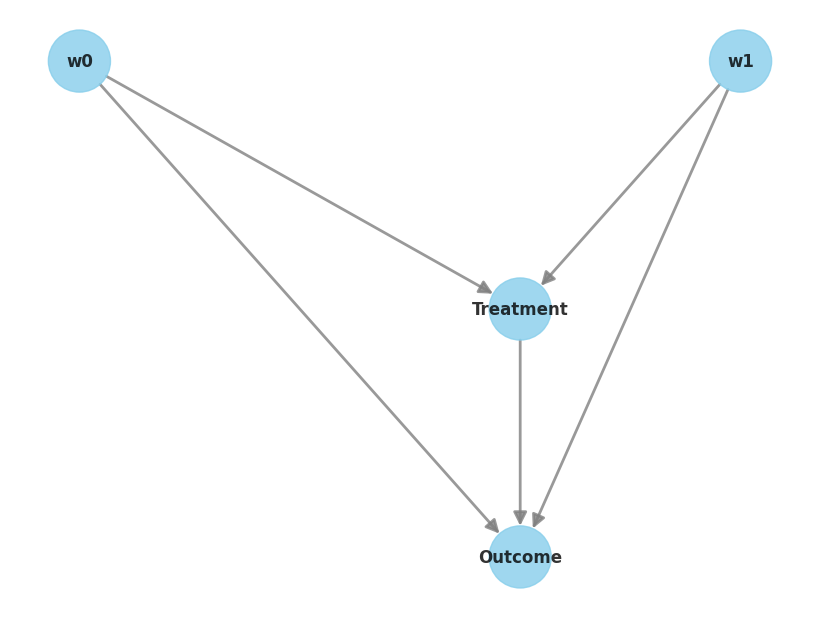

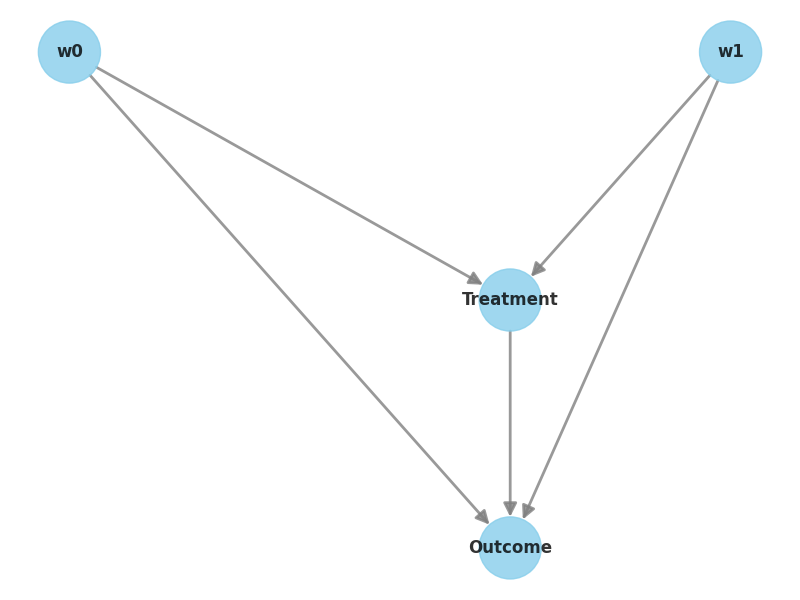

In [ ]:
model= CausalModel(
        data=df,
        treatment=data_dict["treatment_name"],
        outcome=data_dict["outcome_name"],
        common_causes=data_dict["common_causes_names"],
        instruments=data_dict["instrument_names"])
model.view_model(layout="dot")

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

## Identification

In [ ]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w1,w0])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w1,w0,U) = P(Outcome|Treatment,w1,w0)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
     d                        
────────────(E[Outcome|w1,w0])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w1,w0,U) = P(Outcome|Treatment,w1,w0)



## Estimation: DoWhy Linear Regression

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w1,w0])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w1,w0,U) = P(Outcome|Treatment,w1,w0)

## Realized estimand
b: Outcome~Treatment+w1+w0
Target units: ate

## Estimate
Mean value: 1.999730720631142

Causal Estimate is 1.999730720631142


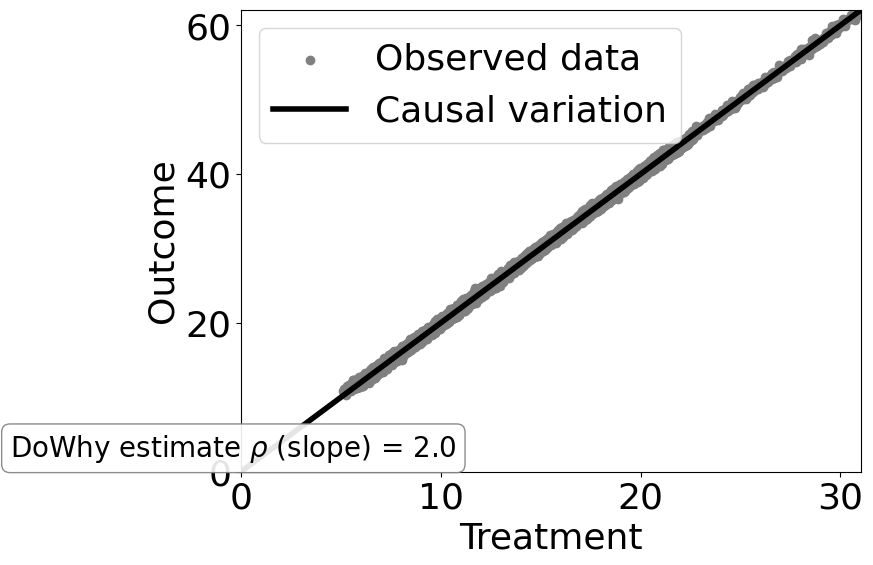

In [ ]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(estimate)
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between action and outcome = causal effect
dowhy.plotter.plot_causal_effect(estimate, df[data_dict["treatment_name"]], df[data_dict["outcome_name"]])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

## Refutation LR

In [ ]:
# Adding a random common cause variable
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Add a random common cause
Estimated effect:1.999730720631142
New effect:1.9997316666940241
p value:0.78



In [ ]:
# Replacing treatment with a random (placebo) variable
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", show_progress_bar=True, placebo_type="permute")
print(res_placebo)



Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Use a Placebo Treatment
Estimated effect:1.999730720631142
New effect:-0.0033300496346102193
p value:0.9



In [ ]:
#Removing a random subset of the data
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", show_progress_bar=True, subset_fraction=0.9)
print(res_subset)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Use a subset of data
Estimated effect:1.999730720631142
New effect:1.999730916809461
p value:0.98



## DoubeML

In [ ]:
!pip install econml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 8.1 MB/s eta 0:00:00


In [ ]:
import sklearn


In [ ]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                 confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(fit_intercept=False),
                                                              'featurizer':PolynomialFeatures(degree=2, include_bias=True)},
                                               "fit_params":{}})
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w1,w0])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w1,w0,U) = P(Outcome|Treatment,w1,w0)

## Realized estimand
b: Outcome~Treatment+w1+w0 | 
Target units: ate

## Estimate
Mean value: 1.0563155882192494
Effect estimates: [[1.05631559]]



## Refutation

In [ ]:
# Adding a random common cause variable
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause", show_progress_bar=True)
print(res_random)




Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Add a random common cause
Estimated effect:1.0563155882192494
New effect:1.0346432417192637
p value:0.58



In [ ]:
# Replacing treatment with a random (placebo) variable
res_placebo=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="placebo_treatment_refuter", show_progress_bar=True, placebo_type="permute")
print(res_placebo)



Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Use a Placebo Treatment
Estimated effect:1.0563155882192494
New effect:3.690136381882341e-05
p value:0.9299999999999999



In [ ]:
#Removing a random subset of the data
res_subset=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="data_subset_refuter", show_progress_bar=True, subset_fraction=0.9)
print(res_subset)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Use a subset of data
Estimated effect:1.0563155882192494
New effect:1.0356329926359695
p value:0.42



In [ ]:
pip install scikit-learn==1.5.2